# Results for NeuralNetworks using Series of size 40

## Objective

## Steps

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import pickle

In [2]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')

In [3]:
df_info.head()

,ico,adress,fraud,start_date,market_start_date,diff_days,market_days,size_ok,price,market_cap,o_concur,biggest_holder,exchange,contract,date_analysis,code,site,social_media
0,0X,0xe41d2489571d322189246dafa5ebde1f4699f498,0,2017-08-11,2017-08-15,4,1124,NaN,NaN,45.0,x,2,6,14,2018-02-11,NaN,NaN,NaN
1,0XCERT,0x83e2be8d114f9661221384b3a50d24b96a5653f5,1,2018-06-26,2018-07-11,15,794,x,NaN,NaN,NaN,12,2,0,2019-01-07,x,x,x
2,4NEW,0x241ba672574a78a3a604cdd0a94429a73a84a324,1,2018-08-20,2018-08-20,0,754,x,NaN,NaN,NaN,50,7,0,2019-02-16,x,NaN,NaN
3,ABULABA,0xd938137e6d96c72e4a6085412ada2dad78ff89c4,1,2018-04-19,2018-12-16,241,636,NaN,x,NaN,NaN,13,7,41,2019-06-14,x,NaN,NaN
4,AELF,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0,2017-12-18,2017-12-21,3,996,NaN,NaN,154.0,x,13,10,0,2018-06-19,NaN,NaN,NaN


## 3. Load data from .py file

In [4]:
with open('dict_arrays_length40.pickle','rb') as pickle_file:
    dict_ico_len_40 = pickle.load(pickle_file) 

In [5]:
dict_ico_len_40.get('arrays')

('array_daily_transactions',
 'array_perc_new_holders',
 'array_biggest_holder',
 'array_newbiers',
 'array_gas_ratio',
 'array_daily_transactions_ma',
 'array_perc_new_holders_ma',
 'array_biggest_holder_ma',
 'array_newbiers_ma',
 'array_gas_ratio_ma')

In [6]:
dict_ico_len_40.pop('arrays')

('array_daily_transactions',
 'array_perc_new_holders',
 'array_biggest_holder',
 'array_newbiers',
 'array_gas_ratio',
 'array_daily_transactions_ma',
 'array_perc_new_holders_ma',
 'array_biggest_holder_ma',
 'array_newbiers_ma',
 'array_gas_ratio_ma')

## 4. Filter data for size equals to 40

In [7]:
dict_perc_transactions = {k:v[0] for k,v in dict_ico_len_40.items() if len(v[0]) == 40}
dict_perc_new_holders = {k:v[1] for k,v in dict_ico_len_40.items() if len(v[1]) == 40}
dict_perc_big_holder = {k:v[2] for k,v in dict_ico_len_40.items() if len(v[2]) == 40}
dict_perc_newbiers = {k:v[3] for k,v in dict_ico_len_40.items() if len(v[3]) == 40}
dict_gas_ratio = {k:v[4] for k,v in dict_ico_len_40.items() if len(v[4]) == 40}
dict_perc_transactions_ma = {k:v[5] for k,v in dict_ico_len_40.items() if len(v[5]) == 40}
dict_perc_new_holders_ma = {k:v[6] for k,v in dict_ico_len_40.items() if len(v[6]) == 40}
dict_perc_big_holder_ma = {k:v[7] for k,v in dict_ico_len_40.items() if len(v[7]) == 40}
dict_perc_newbiers_ma = {k:v[8] for k,v in dict_ico_len_40.items() if len(v[8]) == 40}
dict_gas_ratio_ma = {k:v[9] for k,v in dict_ico_len_40.items() if len(v[9]) == 40}

In [8]:
df_transactions = pd.DataFrame(dict_perc_transactions).T
df_new_holders = pd.DataFrame(dict_perc_new_holders).T
df_big_holder = pd.DataFrame(dict_perc_big_holder).T
df_newbiers = pd.DataFrame(dict_perc_newbiers).T
df_gasratio = pd.DataFrame(dict_gas_ratio).T
df_transactions_ma = pd.DataFrame(dict_perc_transactions_ma).T
df_new_holders_ma = pd.DataFrame(dict_perc_new_holders_ma).T
df_big_holder_ma = pd.DataFrame(dict_perc_big_holder_ma).T
df_newbiers_ma = pd.DataFrame(dict_perc_newbiers_ma).T
df_gasratio_ma = pd.DataFrame(dict_gas_ratio_ma).T

In [9]:
print(df_transactions.shape)
print(df_new_holders.shape)
print(df_big_holder.shape)
print(df_newbiers.shape)
print(df_gasratio.shape)
print(df_transactions_ma.shape)
print(df_new_holders_ma.shape)
print(df_big_holder_ma.shape)
print(df_newbiers.shape)
print(df_gasratio_ma.shape)

(237, 40)
(237, 40)
(237, 40)
(237, 40)
(223, 40)
(237, 40)
(237, 40)
(237, 40)
(237, 40)
(223, 40)


## 5. Dataset for training

### 5.1. Regular Series

In [10]:
df_training_transactions = df_transactions.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_transactions.set_index('ico', inplace=True)

df_training_new_holders = df_new_holders.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders.set_index('ico', inplace=True)

df_training_big_holder = df_big_holder.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_big_holder.set_index('ico', inplace=True)

df_training_newbiers = df_newbiers.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_newbiers.set_index('ico', inplace=True)

df_training_gasratio = df_gasratio.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio.set_index('ico', inplace=True)

### 5.2. Moving Average

In [11]:
df_training_transactions_ma = df_transactions_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_transactions_ma.set_index('ico', inplace=True)

df_training_new_holders_ma = df_new_holders_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders_ma.set_index('ico', inplace=True)

df_training_big_holder_ma = df_big_holder_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_big_holder_ma.set_index('ico', inplace=True)

df_training_newbiers_ma = df_newbiers_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_newbiers_ma.set_index('ico', inplace=True)

df_training_gasratio_ma = df_gasratio_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio_ma.set_index('ico', inplace=True)

In [12]:
print(df_training_transactions_ma.shape)
print(df_training_new_holders_ma.shape)
print(df_training_big_holder_ma.shape)
print(df_training_newbiers_ma.shape)
print(df_training_gasratio_ma.shape)

(237, 41)
(237, 41)
(237, 41)
(237, 41)
(223, 41)


## 5. Training Neuralnets

In [13]:
from ico_parser import ICODeepTraining

### 5.1 Define the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras

In [15]:
model_mlp = Sequential()
model_mlp.add(Dense(40, input_dim=40, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(10, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

In [16]:
ico_training = ICODeepTraining(df_training_big_holder.iloc[:, :-1],
                               df_training_big_holder.iloc[:, -1],
                               model_mlp,
                               ann_type='mlp',
                               size_array=40)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1640      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 3,711
Trainable params: 3,711
Non-trainable params: 0
_________________________________________________________________


In [17]:
earlystop =  keras.callbacks.EarlyStopping(monitor='loss', patience=50)

In [22]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=['recall'] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32,
                      callback=earlystop)

ico_training.plot_training()

ValueError: in user code:

    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:543 train_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:321 _build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1114 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1213 map_structure_with_tuple_paths_up_to
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1213 <listcomp>
        results = [func(*args, **kwargs) for args in zip(flat_path_list,
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1116 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:421 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:440 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:3358 get
        return deserialize(str(identifier))
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:3345 deserialize
        return deserialize_keras_object(
    /home/gabriel/miniconda3/envs/time_series/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:392 deserialize_keras_object
        raise ValueError('Unknown ' + printable_module_name + ':' + object_name)

    ValueError: Unknown metric function:recall


## CNN
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [36]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(40, 1)))
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(224, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [37]:
ico_training = ICODeepTraining(df_training_transactions.iloc[:, :-1],
                               df_training_transactions.iloc[:, -1],
                               model_cnn,
                               ann_type='cnn',
                               size_array=20)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 38, 8)             32        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 8)             200       
_________________________________________________________________
dropout (Dropout)            (None, 36, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 224)               32480     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [38]:
from tensorflow import keras

In [39]:
earlystop =  keras.callbacks.EarlyStopping(monitor='loss', patience=50)

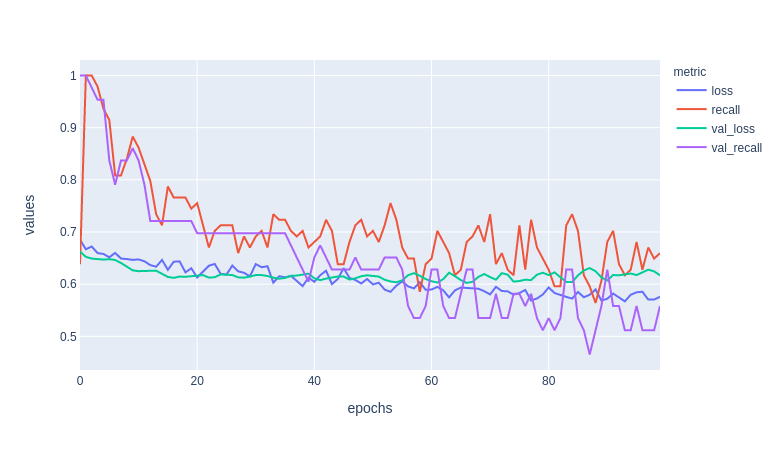

In [40]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=[Recall()] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=64,
                      callback=earlystop)
ico_training.plot_training()

### LSTM
Based on the following articles:
1. https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
2. https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
3. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [42]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

### Using the framework for LSTM

In [46]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(40, 1), return_sequences=True))
model_lstm.add(Dense(60, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

In [48]:
ico_training = ICODeepTraining(df_training_transactions.iloc[:, :-1],
                               df_training_transactions.iloc[:, -1],
                               model_lstm,
                               ann_type='lstm',
                               size_array=40)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 100)           40800     
_________________________________________________________________
dense_14 (Dense)             (None, 40, 60)            6060      
_________________________________________________________________
dense_15 (Dense)             (None, 40, 1)             61        
Total params: 46,921
Trainable params: 46,921
Non-trainable params: 0
_________________________________________________________________


In [49]:
earlystop =  keras.callbacks.EarlyStopping(monitor='loss', patience=50)

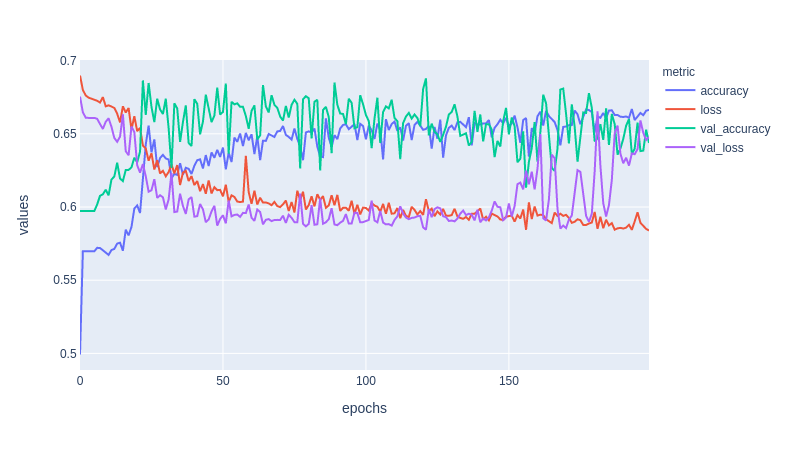

In [50]:
ico_training.train_network(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],#, Recall()],
        epochs=200,
        verbose=0,
        batch_size=64,
        callback=earlystop)
ico_training.plot_training()